# Notebook de aprendizaje supervisado regresión usando redes neuronales, regresión logistica, máquinas de vector soporte, k-vecino más cercano y árboles de decisión.

**Palabras clave:
Predicción de energía,
simulación de lluvias cósmicas,
aprendizaje automático supervisado.**

In [ ]:
import pandas as pd #Biblioteca para importar datos.
import numpy as np #Biblioteca para crear arreglos.
import seaborn as sns #Biblioteca para plotear datos con plantillas específicas.
from matplotlib import pyplot as plt #Biblioteca para plotear.
from IPython.display import Image #Biblioteca para mostrar imágenes.
import tensorflow as tf #Biblioteca para plotear el modelo de la red neuronal.
from keras.models import Sequential #Biblioteca para crear modelos secuenciales.
from keras.layers import Dense #Biblioteca para crear las capas de las redes neuronales (Una capa consta de una función de cálculo de tensor de entrada y tensor de salida).
from keras.optimizers import Adam #Biblioteca del optimizador que implementa el algoritmo Adam.
import sklearn #Biblioteca para implementar aprendizaje automático.
from sklearn import preprocessing #Biblioteca para normalizar datos.
from sklearn.model_selection import train_test_split #Biblioteca para divir los datos de entrenamiento.
from sklearn.metrics import r2_score #Biblioteca de (coeficiente de determinación) función de puntuación.
from sklearn.linear_model import LogisticRegression #Biblioteca para implementar el modelo de Regresión Logística.
from sklearn.svm import SVC #Biblioteca para implementar el modelo de Máquinas de Vectores de Soporte.
from sklearn.neighbors import KNeighborsClassifier #Bibliotecas para implementar el modelo del K-Vecinos más Cercanos
from sklearn.tree import DecisionTreeClassifier #Bibliotecas para implementar el modelo Árboles de Decisión.
#Autores:
##Chaparro Amaro Oscar Roberto
##Martínez Felipe Miguel de Jesús
##Martínez Castro Jesús Alberto

#El siguiente conjunto de datos se obtuvo por las instituciones que acontinuación se presentan y su uso es únicamente para fines didácticos:

#Instituto de Física, UNAM, Mexico
#III. Physics Institute A, RWTH Aachen University, Germany
#Centro de Investigación en Computación, Instituto Politécnico Nacional, Mexico
#Instituto de Astronomía, UNAM, Mexico
#III. Physics Institute B, RWTH Aachen University, Germany
#Instituto Nacional de Astrofísica, Óptica y Electrónica, Mexico

In [ ]:
!wget https://www.dropbox.com/s/szf1kcc7a0658pq/HAWCsEye_MC_gammas.csv?dl=0 -O HAWCsEye_MC_gammas.csv
!wget https://www.dropbox.com/s/d8nt5tsjkq8rsz1/TRUE.csv?dl=0 -O TRUE.csv
!wget https://www.dropbox.com/s/t20napg567oph8b/ceres.png?dl=0 -O ceres.png

--2022-11-18 02:28:10--  https://www.dropbox.com/s/szf1kcc7a0658pq/HAWCsEye_MC_gammas.csv?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.65.18, 2620:100:6021:18::a27d:4112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.65.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/szf1kcc7a0658pq/HAWCsEye_MC_gammas.csv [following]
--2022-11-18 02:28:11--  https://www.dropbox.com/s/raw/szf1kcc7a0658pq/HAWCsEye_MC_gammas.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc9ca0de78bc84353113e69b9192.dl.dropboxusercontent.com/cd/0/inline/Bw8OyIH1X2Db3uUouInpe4EZ4hknpQrhff9jhQK45io0AN7p6Nzjfnv4mSaOxRwvRVZ2iewEWWep6WSLVAx5E3pxVuFmgXfsJWFOzXcH4Fq5ZSJt9tSnGtT7gz6R8AaEDVLMuF8--7VMf_9TTTdh7l5T8lugHWi0BA0aggNyt6YjBg/file# [following]
--2022-11-18 02:28:12--  https://uc9ca0de78bc84353113e69b9192.dl.dropboxusercontent.com/cd/0/inline/Bw8OyIH1X2Db3uUouInpe4EZ4hknpQrhff9jhQK45i

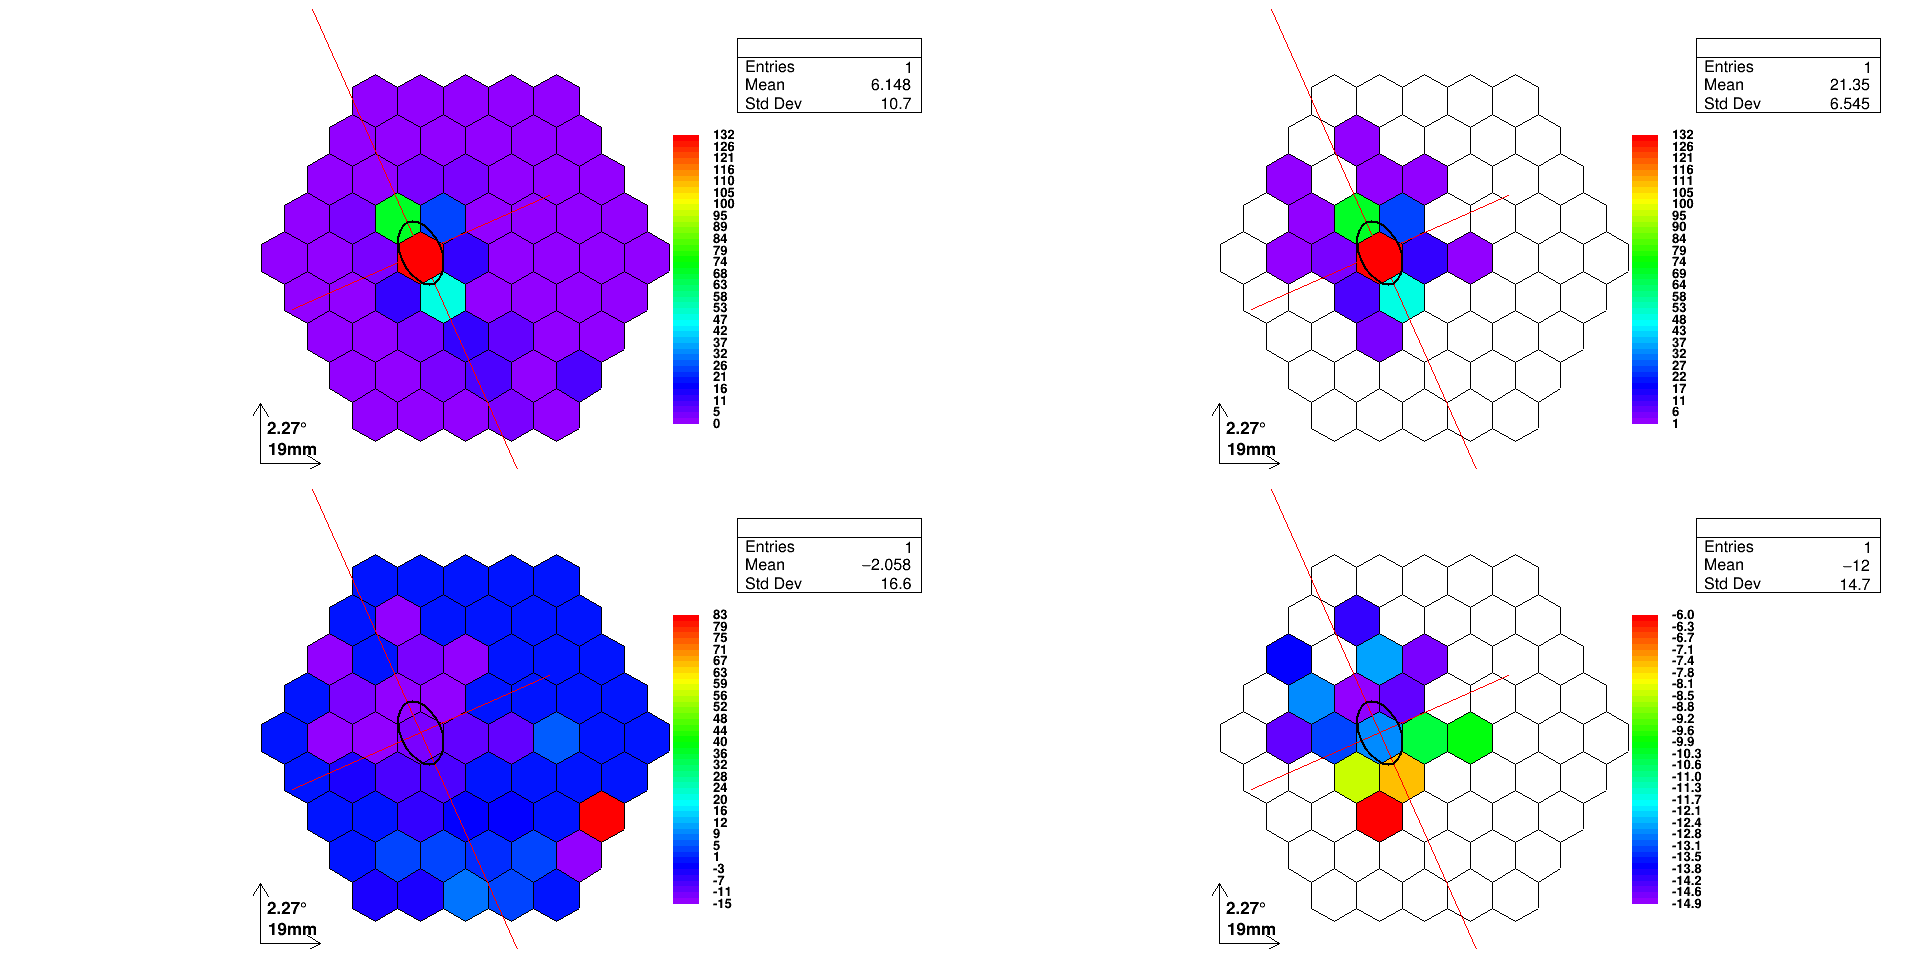

In [ ]:
Image('/content/ceres.png')

In [ ]:
df1 = pd.read_csv('/content/HAWCsEye_MC_gammas.csv',usecols=['Dist','Width','SizeMainInsland','Impact','Alpha','Logsize','NewLeakage1','TimeSpread','TimeSpreadWeighted'])
df2 = pd.read_csv('/content/TRUE.csv')

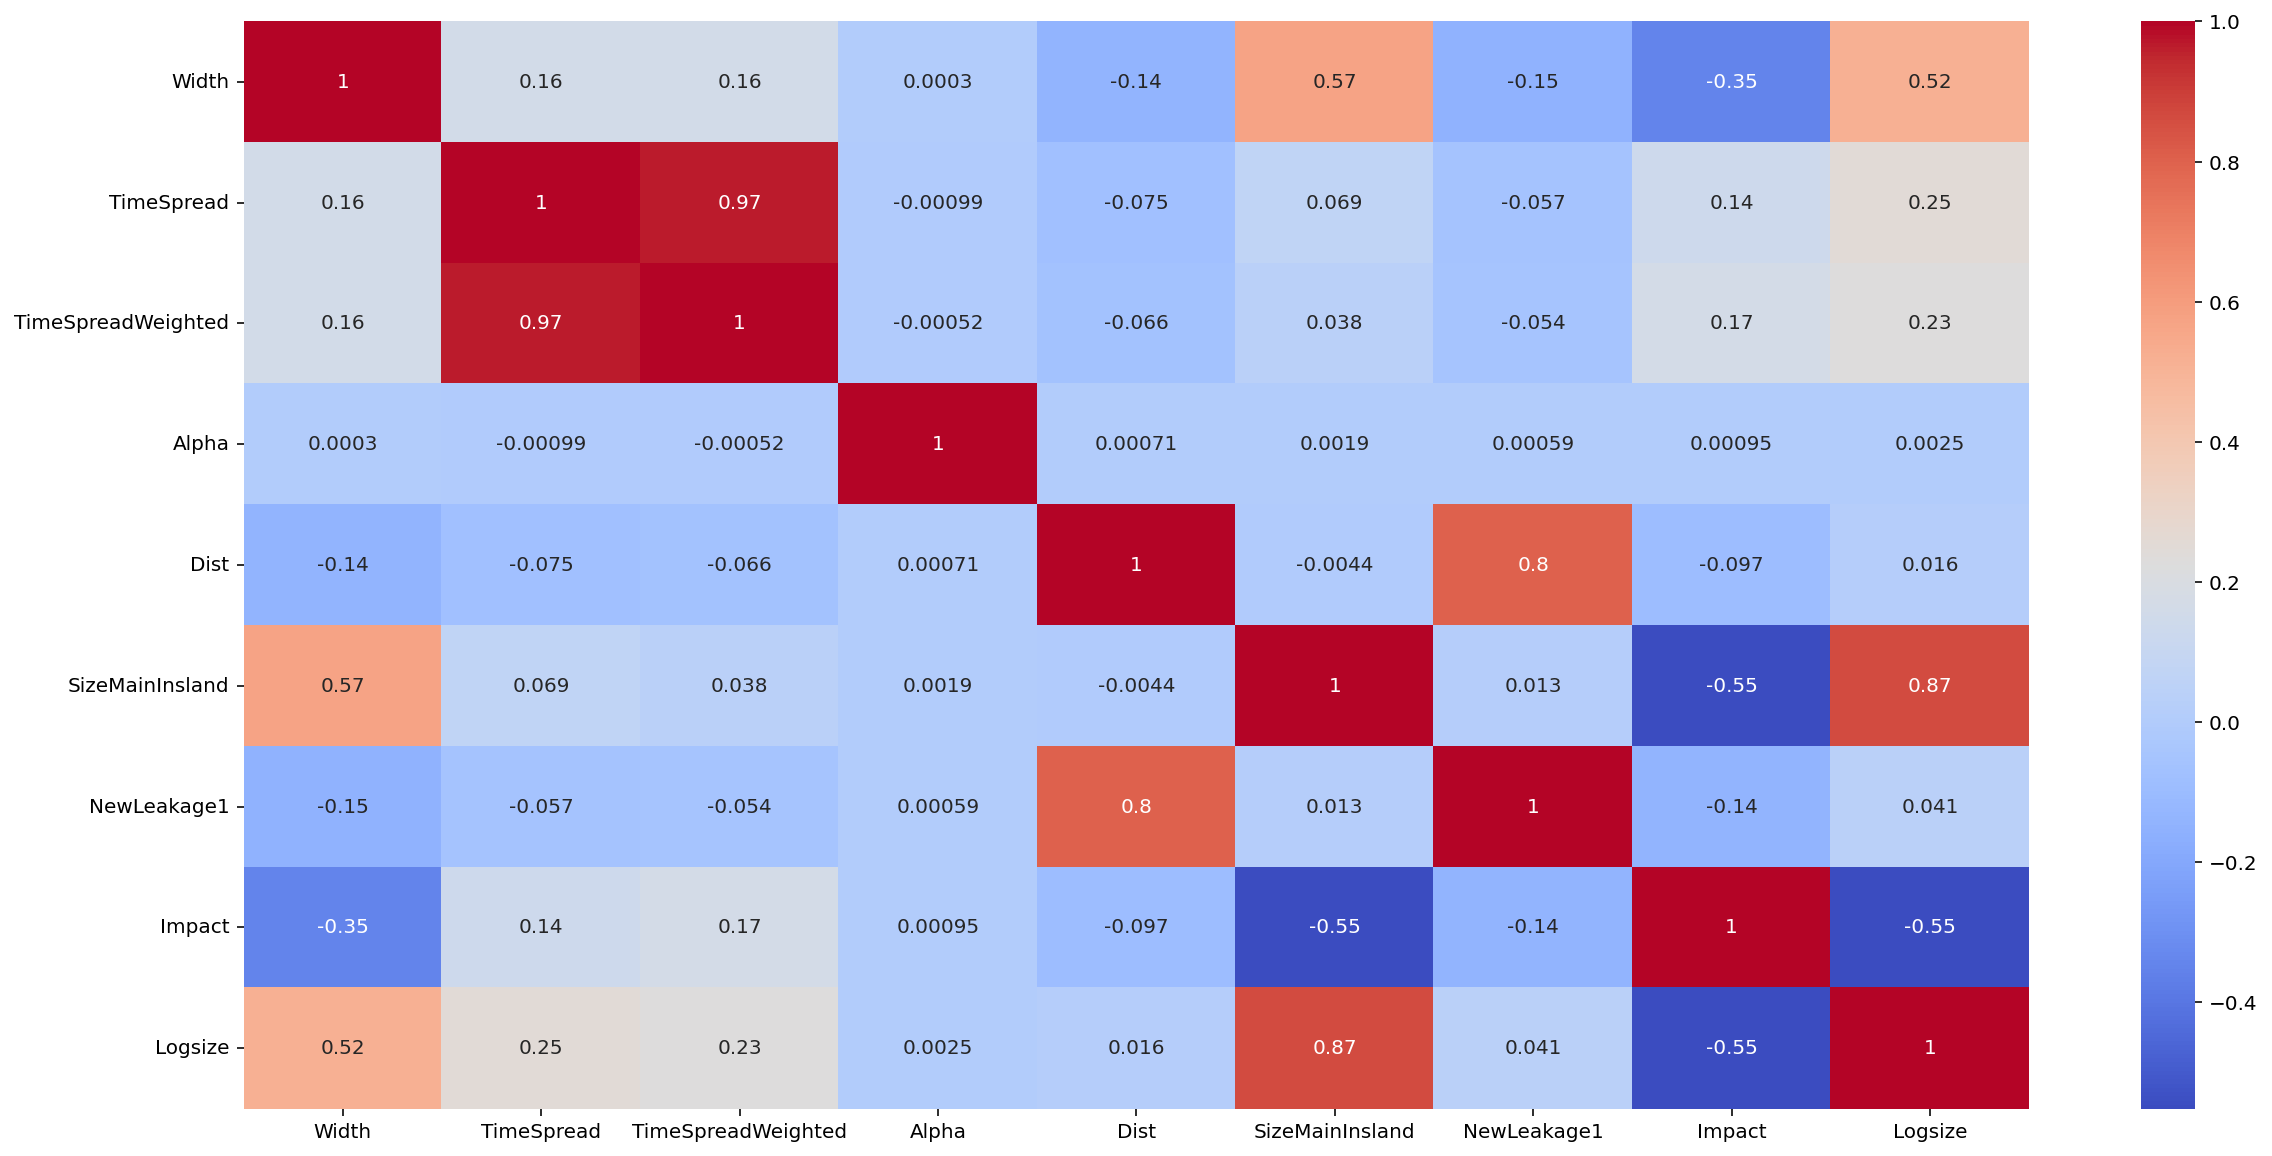

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(df1.corr(), annot=True, cmap='coolwarm')

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169052 entries, 0 to 169051
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Width               169052 non-null  float64
 1   TimeSpread          169052 non-null  float64
 2   TimeSpreadWeighted  169052 non-null  float64
 3   Alpha               169052 non-null  float64
 4   Dist                169052 non-null  float64
 5   SizeMainInsland     169052 non-null  float64
 6   NewLeakage1         169052 non-null  float64
 7   Impact              169052 non-null  float64
 8   Logsize             169052 non-null  float64
dtypes: float64(9)
memory usage: 11.6 MB


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df1[0:1000], df2[0:1000], test_size=0.2)

In [ ]:
X_train = preprocessing.scale(X_train)

X_test = preprocessing.scale(X_test)

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


7/7 [==============================] - 0s 2ms/step
The R2 score on the Train set is:	0.888
The R2 score on the Test set is:	0.849


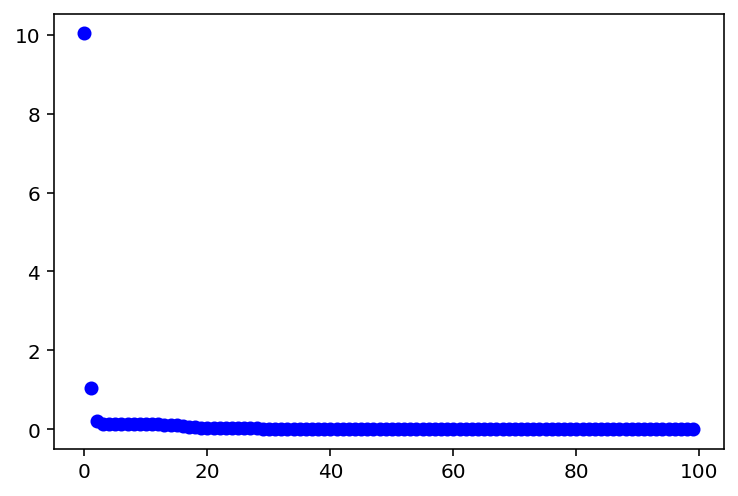

In [ ]:
# Defines "deep" model and its structure
model = Sequential()
model.add(Dense(13, input_shape=(len(df1.columns),), activation='sigmoid'))
model.add(Dense(13, activation='sigmoid'))
model.add(Dense(13, activation='sigmoid'))
model.add(Dense(13, activation='sigmoid'))
model.add(Dense(1,))
#model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])
model.compile(Adam(lr=0.003), 'mean_squared_error')


# Fits model over 2000 iterations with 'earlystopper' callback, and assigns it to history
history = model.fit(X_train, y_train, epochs = 100, validation_split = 0.0,shuffle = True, verbose = 0) #1000
#, callbacks = [earlystopper]

# Plots 'history'
history_dict=history.history
loss_values = history_dict['loss']
#val_loss_values=history_dict['val_loss']
plt.plot(loss_values,'bo',label='training loss')
#plt.plot(val_loss_values,'r',label='training loss val')


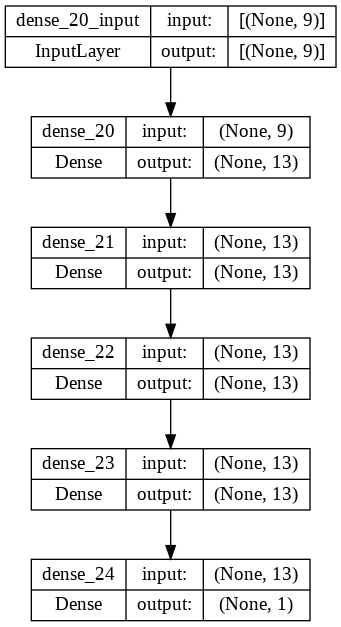

In [ ]:
tf.keras.utils.plot_model(model, 'model.png', show_shapes=True)

In [ ]:
# Runs model with its current weights on the training and testing data
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculates and prints r2 score of training and testing data
print("Mean Accuracy Redes Neuronales Multicapa Datos de Entrenamiento::\t{:0.3f}".format(r2_score(y_train, y_train_pred)))
print("Mean Accuracy Redes Neuronales Multicapa Datos de Prueba:\t{:0.3f}".format(r2_score(y_test, y_test_pred)))

7/7 [==============================] - 0s 4ms/step
Mean Accuracy Redes Neuronales Multicapa Datos de Entrenamiento::	0.888
Mean Accuracy Redes Neuronales Multicapa Datos de Prueba:	0.849


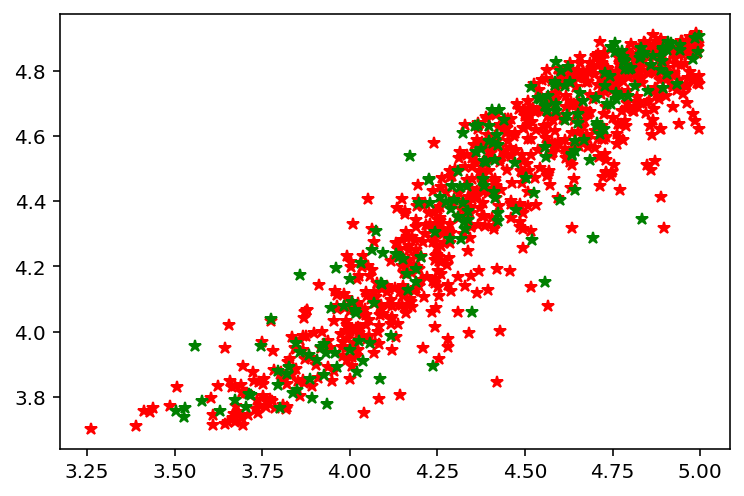

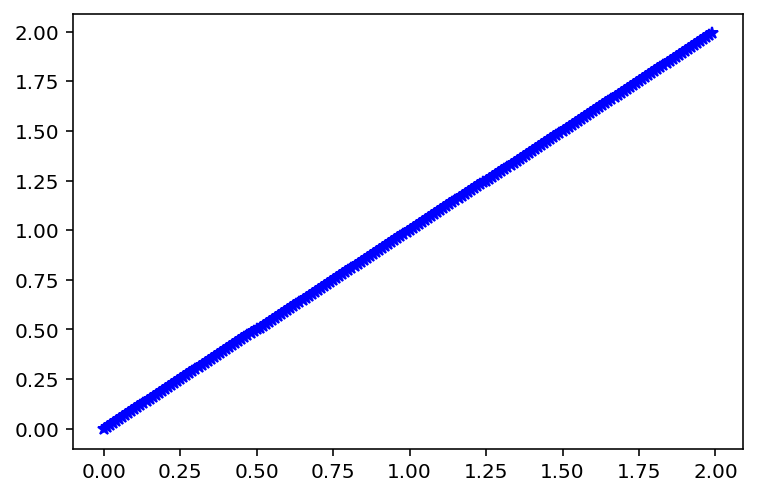

In [ ]:
plt.plot(y_train, y_train_pred,'*r')
plt.plot(y_test, y_test_pred, '*g')
plt.figure()
for i in range(0,len(y_test_pred)):
    plt.plot(i/100,i/100,'*b')

In [ ]:
df_prediction = pd.DataFrame(data=y_test_pred, columns=["y_pred"])
df_real = pd.DataFrame(data=y_test.values, columns=["TRUE"])

In [ ]:
df_join = df_prediction.join(df_real["TRUE"])
df_join

,y_pred,TRUE
0,4.900825,4.985555
1,4.396630,4.273219
2,4.370246,4.335839
3,4.753952,4.813347
4,4.230303,4.204158
...,...,...
195,4.716217,4.701233
196,3.854037,4.085847
197,4.830097,4.785613
198,4.059133,4.347353


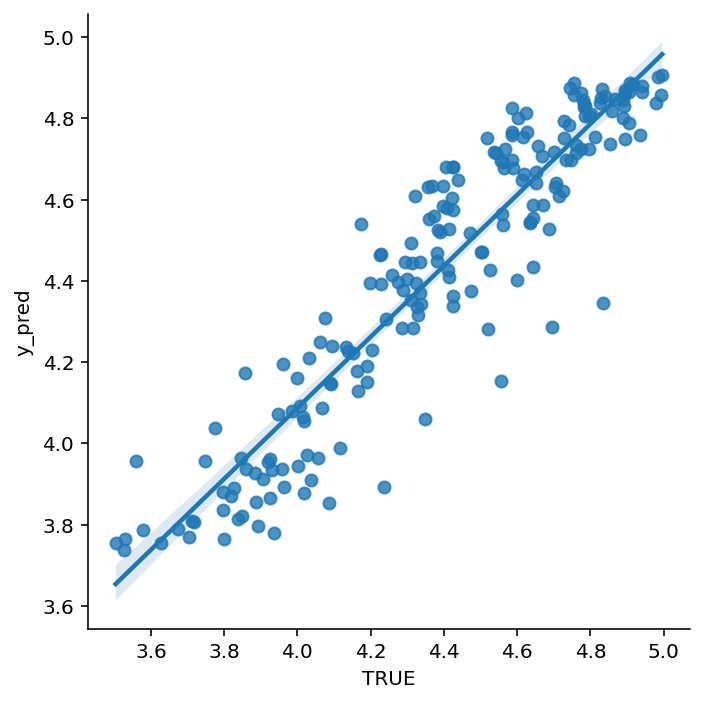

In [ ]:
sns.lmplot(x="TRUE", y="y_pred", data=df_join);

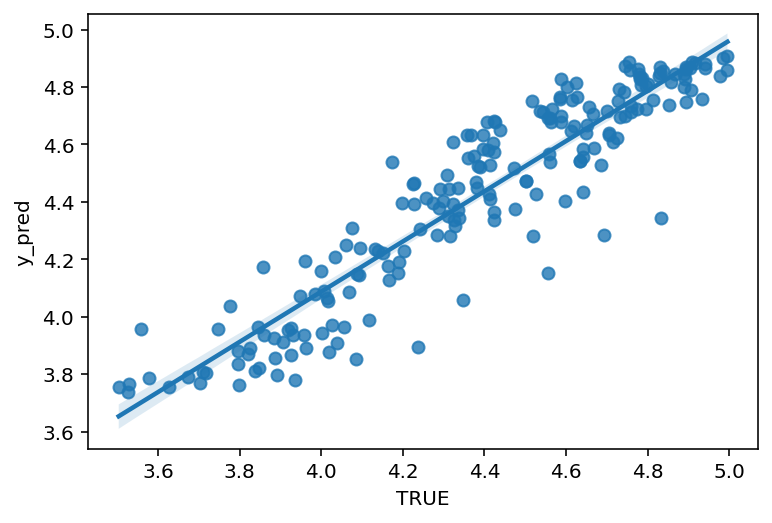

In [ ]:
sns.regplot(x="TRUE", y="y_pred", data=df_join);

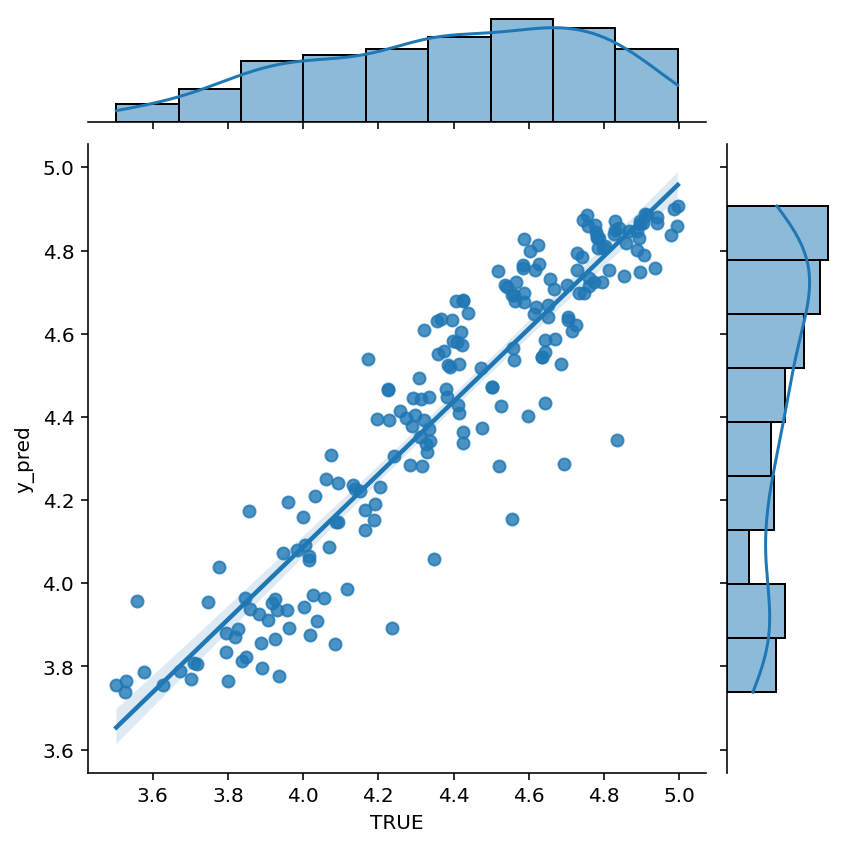

In [ ]:
sns.jointplot(x="TRUE", y="y_pred", data=df_join, kind="reg");

In [ ]:
df_join.to_csv('80-20_v12.csv', index = False)

In [ ]:
#Modelo de Regresión Logística
algoritmo = LogisticRegression()
algoritmo.fit(np.int64(X_train), np.int64(y_train))
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
print("Mean Accuracy Regresión Logística Datos de Entrenamiento:\t{:0.3f}".format(algoritmo.score(np.int64(X_train), np.int64(y_train))))
print("Mean Accuracy Regresión Logística Datos de Prueba:\t{:0.3f}".format(algoritmo.score(np.int64(X_test), np.int64(y_test_pred))))

25/25 [==============================] - 0s 3ms/step


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


7/7 [==============================] - 0s 3ms/step
Mean Accuracy Regresión Logística Datos de Entrenamiento:	0.891
Mean Accuracy Regresión Logística Datos de Prueba:	0.860


In [ ]:
#Modelo de Máquinas de Vectores de Soporte
algoritmo = SVC()
algoritmo.fit(np.int64(X_train), np.int64(y_train))
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
print("Mean Accuracy Máquinas de Vectores de Soporte Datos de Entrenamiento:\t{:0.3f}".format(algoritmo.score(np.int64(X_train), np.int64(y_train))))
print("Mean Accuracy Máquinas de Vectores de Soporte Datos de Prueba:\t{:0.3f}".format(algoritmo.score(np.int64(X_test), np.int64(y_test_pred))))

7/7 [==============================] - 0s 2ms/step


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean Accuracy Máquinas de Vectores de Soporte Datos de Entrenamiento:	0.900
Mean Accuracy Máquinas de Vectores de Soporte Datos de Prueba:	0.860


In [ ]:
#Modelo de K-Vecinos más Cercanos
algoritmo = KNeighborsClassifier(n_neighbors=5)
algoritmo.fit(np.int64(X_train), np.int64(y_train))
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
print("Mean Accuracy Vecinos más Cercanos Datos de Entrenamiento:\t{:0.3f}".format(algoritmo.score(np.int64(X_train), np.int64(y_train))))
print("Mean Accuracy Vecinos más Cercanos Datos de Prueba:\t{:0.3f}".format(algoritmo.score(np.int64(X_test), np.int64(y_test_pred))))

25/25 [==============================] - 0s 3ms/step


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


7/7 [==============================] - 0s 3ms/step
Mean Accuracy Vecinos más Cercanos Datos de Entrenamiento:	0.873
Mean Accuracy Vecinos más Cercanos Datos de Prueba:	0.785


In [ ]:
#Modelo de Árboles de Decisión
algoritmo = DecisionTreeClassifier()
algoritmo.fit(np.int64(X_train), np.int64(y_train))
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
print("Mean Accuracy Árboles de Decisión Datos de Entrenamiento:\t{:0.3f}".format(algoritmo.score(np.int64(X_train), np.int64(y_train))))
print("Mean Accuracy Árboles de Decisión Datos de Prueba:\t{:0.3f}".format(algoritmo.score(np.int64(X_test), np.int64(y_test_pred))))

7/7 [==============================] - 0s 2ms/step
Mean Accuracy Árboles de Decisión Datos de Entrenamiento:	0.921
Mean Accuracy Árboles de Decisión Datos de Prueba:	0.860


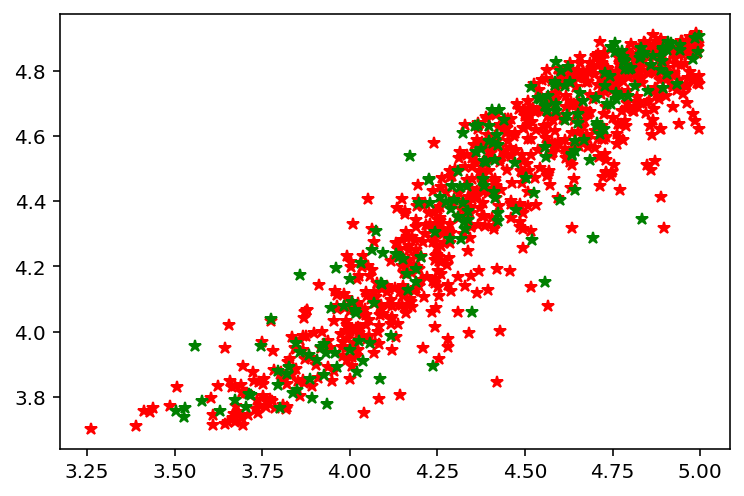

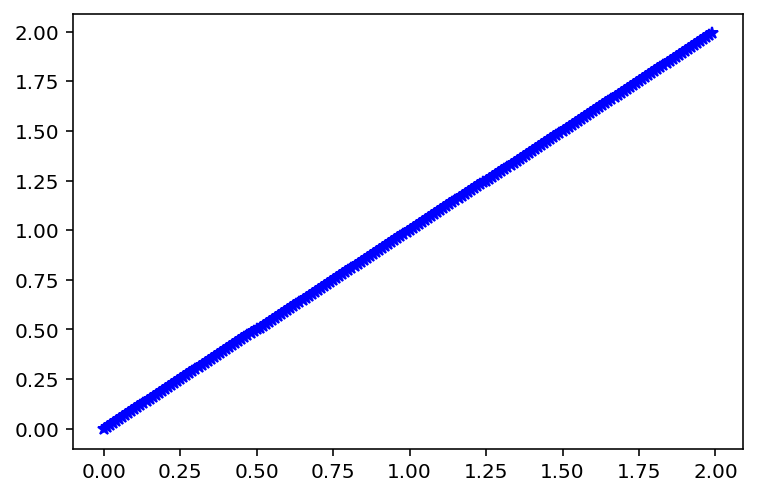

In [ ]:
plt.plot(y_train, y_train_pred,'*r')
plt.plot(y_test, y_test_pred, '*g')
plt.figure()
for i in range(0,len(y_test_pred)):
    plt.plot(i/100,i/100,'*b')

In [ ]:
df_predictionTree = pd.DataFrame(data=y_test_pred, columns=["y_pred"])
df_real = pd.DataFrame(data=y_test.values, columns=["TRUE"])

In [ ]:
df_join = df_predictionTree.join(df_real["TRUE"])
df_join

,y_pred,TRUE
0,4.900825,4.985555
1,4.396630,4.273219
2,4.370246,4.335839
3,4.753952,4.813347
4,4.230303,4.204158
...,...,...
195,4.716217,4.701233
196,3.854037,4.085847
197,4.830097,4.785613
198,4.059133,4.347353
